# E-commerce Customer - Linear Regression Project
**By: Syamsul Rizal Fany - saemfany@gmail.com**

I just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired me on contract to help them figure it out! Let's get started!

**This code file can be viewed [here](https://drive.google.com/file/d/1MTdQTlhAqwFrhf-JrDOvaIzlYGsnzEdD/view?usp=sharing)!**

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline (We'll import sklearn as we need it.)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

**The dataset can be downloaded [here](https://drive.google.com/file/d/1wq5gcvJ7ZVPFFTBks_r1CyCgyeePi18I/view?usp=sharing)!**


**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [ ]:
customers = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

In [ ]:
sns.set_style('whitegrid')

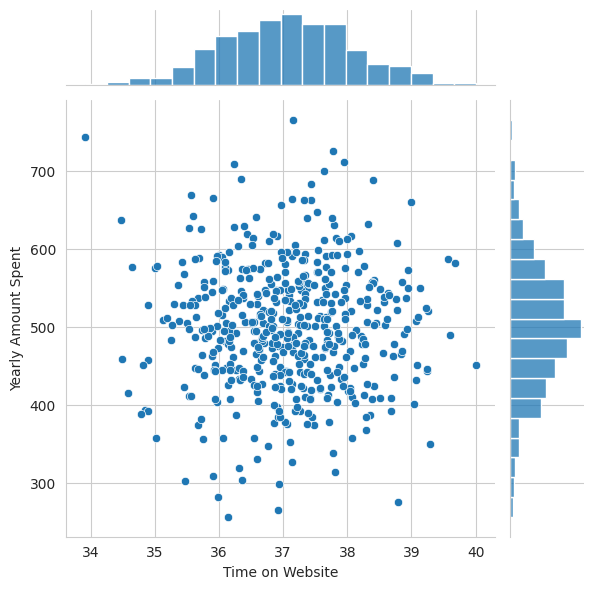

In [ ]:
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent')

**Do the same but with the Time on App column instead.**

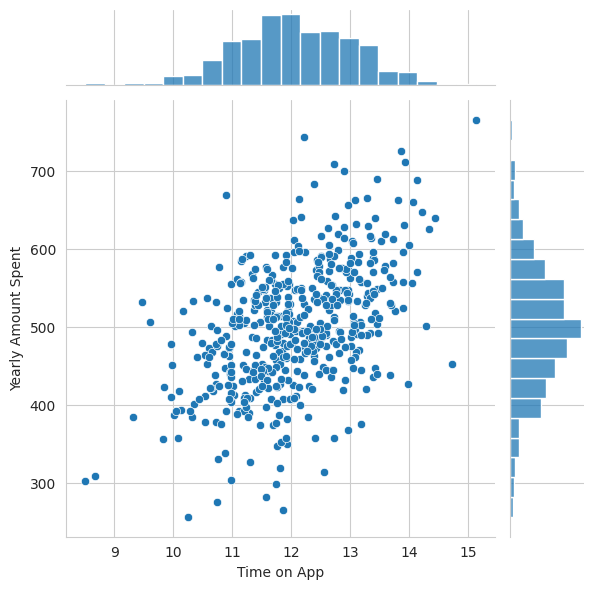

In [ ]:
sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent')

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

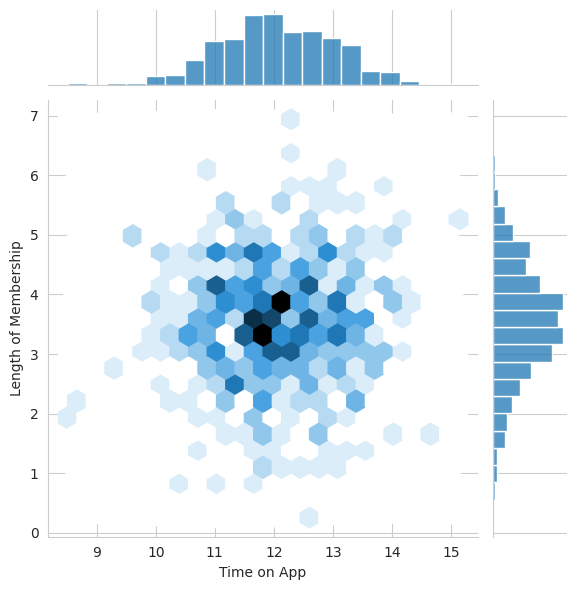

In [ ]:
sns.jointplot(data=customers, x='Time on App', y='Length of Membership', kind='hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.**

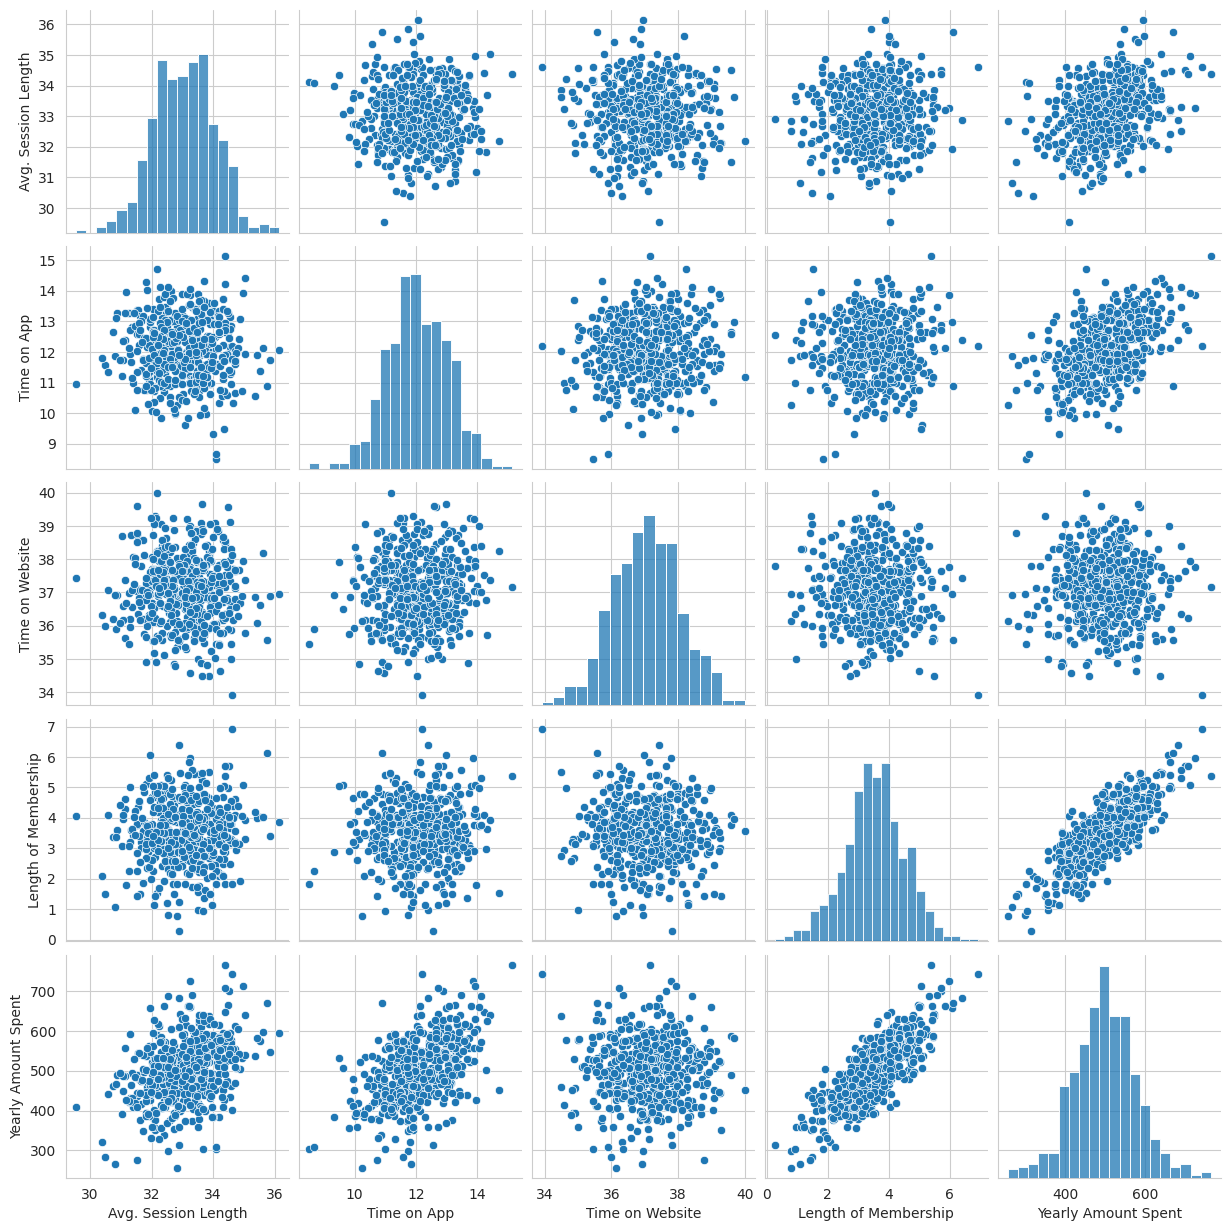

In [ ]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

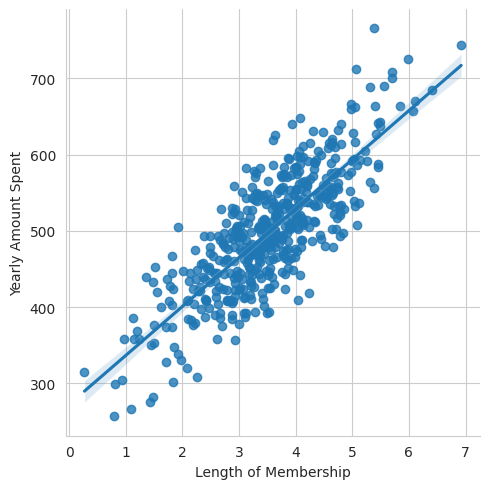

In [ ]:
sns.lmplot(data=customers, x='Length of Membership', y='Yearly Amount Spent')

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [ ]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [ ]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [ ]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [ ]:
print('Coefficients:\n', lm.coef_)

Coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [ ]:
predictions = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Values')

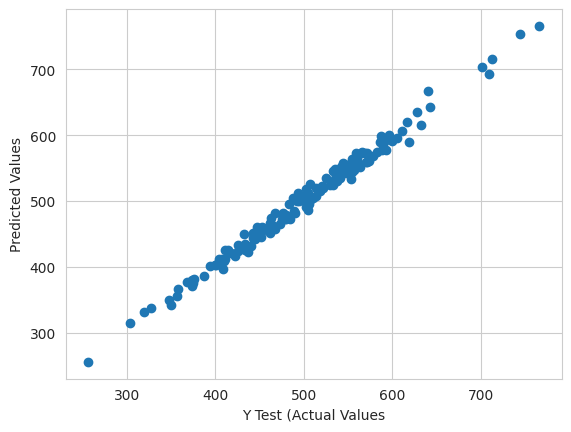

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (Actual Values')
plt.ylabel('Predicted Values')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (\$R^2\$).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  7.228148653430826
MSE:  79.81305165097427
RMSE:  8.933815066978624


In [ ]:
metrics.explained_variance_score(y_test, predictions)

0.9890771231889606

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9890046246741234

Here are the evaluation metrics:

- **MAE (Mean Absolute Error):** 7.23
- **MSE (Mean Squared Error):** 79.81
- **RMSE (Root Mean Squared Error):** 8.93
- **R² Score:** 0.989

The R² score of **0.989** indicates that the model explains 98.9% of the variance in the target variable, suggesting a very good fit. Lower error values (MAE, MSE, and RMSE) also reflect that the model predictions are fairly close to the actual values.

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

**Plot a histogram of the residuals and make sure it looks normally distributed.**

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

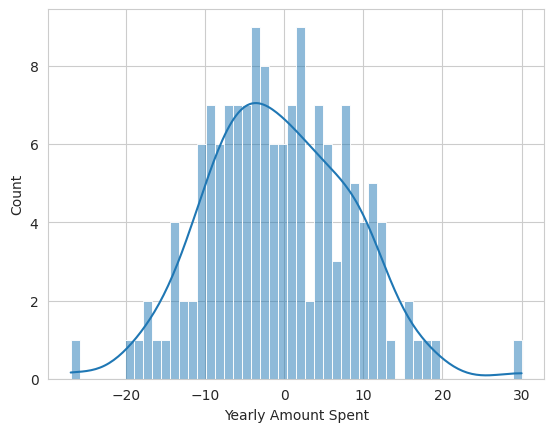

In [ ]:
sns.histplot((y_test-predictions), bins=50, kde=True)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [ ]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficent'])
cdf

,Coefficent
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


The coefficients in this regression model give insight into the effect each variable has on the target, **Yearly Amount Spent**. Here’s a breakdown of each coefficient:

1. **Avg. Session Length (25.98):** For each additional unit increase in Avg. Session Length, the Yearly Amount Spent increases by approximately $25.98, holding other factors constant.
   
2. **Time on App (38.59):** An additional unit of Time on App increases the Yearly Amount Spent by around $38.59, suggesting that app usage has a relatively strong influence on spending.

3. **Time on Website (0.19):** Time on Website has a much smaller impact on spending, with each additional unit increasing the Yearly Amount Spent by just $0.19. This weak coefficient suggests that the website may not be as influential in driving customer spending.

4. **Length of Membership (61.28):** Each additional unit of Length of Membership increases the Yearly Amount Spent by $61.28. This is the highest coefficient, which highlights the importance of membership duration on spending behavior.

### Interpretation and Recommendation
Based on these coefficients, **the mobile app appears to have a more significant effect on spending compared to the website**. Additionally, **Length of Membership** has the strongest positive effect on Yearly Amount Spent, suggesting that customer retention and membership loyalty are crucial.

Thus, the company should likely prioritize **mobile app development and strategies to extend customer membership duration** to maximize spending, rather than focusing efforts on website development.

## Saving the Model as a .pkl (pickle) File
In this step, the created model is converted into a .pkl file format using the joblib library.

In [ ]:
import joblib

In [ ]:
# Save the model to a .pkl file
joblib.dump(lm, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

## Testing the Model Saved in .pkl Format
In this step, we will predict the Yearly Amount Spent by providing inputs such as Avg. Session Length, Time on App, Time on Website, and Length of Membership into the model we previously created and saved in .pkl format.

In [ ]:
# Load the model from the file
model = joblib.load('linear_regression_model.pkl')

# Use the model to make predictions
avg_session_length = float(input("Enter Avg. Session Length: "))
time_on_app = float(input("Enter Time on App: "))
time_on_website = float(input("Enter Time on Website: "))
length_of_membership = float(input("Enter Length of Membership: "))
prediction = model.predict([[avg_session_length, time_on_app, time_on_website, length_of_membership]])
print(f"Predicted Yearly Amount Spent: {prediction[0]}")

Enter Avg. Session Length: 12
Enter Time on App: 34
Enter Time on Website: 23
Enter Length of Membership: 12
Predicted Yearly Amount Spent: 1315.6396919582057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
